In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm

from scipy.stats import multivariate_normal as mvn

In [2]:
VIP_Test = pd.read_csv('VIP_Test.csv')
VIP_Train = pd.read_csv('VIP_Train.csv')

## EDA

## Training set

In [3]:
VIP_Train

,Player_Id,Deposit_Amount,Deposit_Quantity,Deposit_Method,Age,Country,Gender,Dim_Alert_Type_Desc,VIP
0,613972,30.173168,5,v3_ebs,31.0,RO,?,All Deposit,0
1,1001159,4871.409870,1,instadebitviasc,30.0,VG,F,All Deposit,0
2,2405146,37.812566,3,ifund-smooth-usd,21.0,LB,M,Special,0
3,3694261,52.722560,15,diners,33.0,NZ,M,Sign Up,0
4,7004960,42.776558,3,lateralpayments,55.0,IR,M,All Deposit,0
...,...,...,...,...,...,...,...,...,...
34995,1709649,0.000000,0,mastercardcredit,25.0,KW,M,All Deposit,0
34996,4947176,55.191792,3,ipay,32.0,OM,M,All Deposit,0
34997,4296112,52.488510,13,multibanco,53.0,UY,F,Special,0
34998,7991148,28.171643,1,banktransfer,41.0,GG,M,First_Deposit,0


In [4]:
#check for NaN
checking_NaN = VIP_Train.isnull().values.any() 
checking_NaN

True

In [5]:
#locate rows where null values appear
NaN_rows = VIP_Train[VIP_Train.isnull().any(axis=1)]
NaN_rows

,Player_Id,Deposit_Amount,Deposit_Quantity,Deposit_Method,Age,Country,Gender,Dim_Alert_Type_Desc,VIP
17,5677756,0.000000,0,dineromail,32.0,NaN,F,First_Deposit,0
71,5237723,67.121977,18,s_trustmarque,43.0,NaN,M,First_Deposit,0
103,4953917,0.000000,0,poli,36.0,TN,M,NaN,0
114,2440105,51.030622,1,ecopayz,NaN,FO,M,Sign Up,0
125,5484492,0.000000,0,clearchex,20.0,MZ,M,NaN,0
...,...,...,...,...,...,...,...,...,...
34900,7123938,0.000000,0,lateralpayments,30.0,MG,?,NaN,0
34943,5079126,79.554792,22,ppprepaidcard,30.0,NaN,F,First_Deposit,0
34947,5059554,34.929140,2,NaN,36.0,ET,M,Re-deposit,0
34958,3328480,0.000000,0,ewire,23.0,ZA,NaN,Sign Up,0


In [6]:
#locate columns where null values appear
NaN_columns = VIP_Train.isna().any()
NaN_columns

Player_Id              False
Deposit_Amount         False
Deposit_Quantity       False
Deposit_Method          True
Age                     True
Country                 True
Gender                  True
Dim_Alert_Type_Desc     True
VIP                    False
dtype: bool

In [7]:
#delete all rows that contain NaN values in any cell
VIP_Train.dropna(axis=0, how='any', subset=None, inplace=True)  

In [8]:
VIP_Train

,Player_Id,Deposit_Amount,Deposit_Quantity,Deposit_Method,Age,Country,Gender,Dim_Alert_Type_Desc,VIP
0,613972,30.173168,5,v3_ebs,31.0,RO,?,All Deposit,0
1,1001159,4871.409870,1,instadebitviasc,30.0,VG,F,All Deposit,0
2,2405146,37.812566,3,ifund-smooth-usd,21.0,LB,M,Special,0
3,3694261,52.722560,15,diners,33.0,NZ,M,Sign Up,0
4,7004960,42.776558,3,lateralpayments,55.0,IR,M,All Deposit,0
...,...,...,...,...,...,...,...,...,...
34994,8320542,57.606639,1,kalixa,39.0,CV,M,All Deposit,0
34995,1709649,0.000000,0,mastercardcredit,25.0,KW,M,All Deposit,0
34996,4947176,55.191792,3,ipay,32.0,OM,M,All Deposit,0
34997,4296112,52.488510,13,multibanco,53.0,UY,F,Special,0


In [9]:
#check to see that all rows containing NaN values have been dropped 
VIP_Train.isnull().values.any() 

False

In [10]:
#locate columns where '?' appear
NaN_columns = VIP_Train.eq('?').any()
NaN_columns

Player_Id              False
Deposit_Amount         False
Deposit_Quantity       False
Deposit_Method         False
Age                    False
Country                False
Gender                  True
Dim_Alert_Type_Desc     True
VIP                    False
dtype: bool

## Deal with the 'Deposit_Method' column

### Label encoding 'Deposit_Method' because there are 154 unique Deposit methods; too many to one hot encode

In [11]:
#create another category called 'Deposit_Method_encoded' which contains the encoded Deposit Methods. The coding of labels is done in alphabetical order
VIP_Train['Deposit_Method_encoded'] = VIP_Train['Deposit_Method'].astype('category').cat.codes    #The Deposit Methods in 'Deposit_Method' are coded from 0 to 153 in alphabetical order


## Deal with the 'Country' column

### Label encoding 'Country' because there are 195 unique countries; too many to one hot encode

In [12]:
#create another category called 'Country_encoded' which contains the encoded Countries. The coding of labels is done in alphabetical order
VIP_Train['Country_encoded'] = VIP_Train['Country'].astype('category').cat.codes    #The country labels in 'Country' are coded from 0 to 194 in alphabetical order

In [13]:
VIP_Train

,Player_Id,Deposit_Amount,Deposit_Quantity,Deposit_Method,Age,Country,Gender,Dim_Alert_Type_Desc,VIP,Deposit_Method_encoded,Country_encoded
0,613972,30.173168,5,v3_ebs,31.0,RO,?,All Deposit,0,135,152
1,1001159,4871.409870,1,instadebitviasc,30.0,VG,F,All Deposit,0,69,186
2,2405146,37.812566,3,ifund-smooth-usd,21.0,LB,M,Special,0,67,108
3,3694261,52.722560,15,diners,33.0,NZ,M,Sign Up,0,27,141
4,7004960,42.776558,3,lateralpayments,55.0,IR,M,All Deposit,0,77,91
...,...,...,...,...,...,...,...,...,...,...,...
34994,8320542,57.606639,1,kalixa,39.0,CV,M,All Deposit,0,75,47
34995,1709649,0.000000,0,mastercardcredit,25.0,KW,M,All Deposit,0,86,104
34996,4947176,55.191792,3,ipay,32.0,OM,M,All Deposit,0,73,142
34997,4296112,52.488510,13,multibanco,53.0,UY,F,Special,0,98,181


## Deal with the 'Gender' column

### One hot encoding gender because there are only three categories: '?', 'M', 'F' and the categories are non-ordinal

In [14]:
Gender_encoded = pd.get_dummies(VIP_Train['Gender'], dtype=int, prefix="Gender") #one hot encode the unique gender categories as a dataframe
VIP_Train = VIP_Train.join(Gender_encoded) #join the dataframe to the main dataframe

In [15]:
Gender_encoded

,Gender_?,Gender_F,Gender_M
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
34994,0,0,1
34995,0,0,1
34996,0,0,1
34997,0,1,0


In [16]:
VIP_Train

,Player_Id,Deposit_Amount,Deposit_Quantity,Deposit_Method,Age,Country,Gender,Dim_Alert_Type_Desc,VIP,Deposit_Method_encoded,Country_encoded,Gender_?,Gender_F,Gender_M
0,613972,30.173168,5,v3_ebs,31.0,RO,?,All Deposit,0,135,152,1,0,0
1,1001159,4871.409870,1,instadebitviasc,30.0,VG,F,All Deposit,0,69,186,0,1,0
2,2405146,37.812566,3,ifund-smooth-usd,21.0,LB,M,Special,0,67,108,0,0,1
3,3694261,52.722560,15,diners,33.0,NZ,M,Sign Up,0,27,141,0,0,1
4,7004960,42.776558,3,lateralpayments,55.0,IR,M,All Deposit,0,77,91,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34994,8320542,57.606639,1,kalixa,39.0,CV,M,All Deposit,0,75,47,0,0,1
34995,1709649,0.000000,0,mastercardcredit,25.0,KW,M,All Deposit,0,86,104,0,0,1
34996,4947176,55.191792,3,ipay,32.0,OM,M,All Deposit,0,73,142,0,0,1
34997,4296112,52.488510,13,multibanco,53.0,UY,F,Special,0,98,181,0,1,0


## Deal with the 'Dim_Alert_Type_Desc' column

### One hot encoding Dim_Alert_Type_Desc because there are only six categories: 'Sign up', 'Special', 'First_Deposit', 'Re-deposit', '?', 'All Deposit' and the categories are non-ordinal

In [17]:
#how many unique countries are there
len(VIP_Train['Dim_Alert_Type_Desc'].unique())

6

In [18]:
VIP_Train['Dim_Alert_Type_Desc'].value_counts()

Dim_Alert_Type_Desc
Sign Up          5634
Special          5619
First_Deposit    5562
Re-deposit       5507
?                5482
All Deposit      5462
Name: count, dtype: int64

In [19]:
Dim_Alert_Type_Desc_encoded = pd.get_dummies(VIP_Train['Dim_Alert_Type_Desc'], dtype=int, prefix = 'Dim_Alert_Type_Desc') #one hot encode the unique Dim_Alert_Type_Desc categories as a dataframe
VIP_Train = VIP_Train.join(Dim_Alert_Type_Desc_encoded) #join the dataframe to the main dataframe

In [20]:
VIP_Train

,Player_Id,Deposit_Amount,Deposit_Quantity,Deposit_Method,Age,Country,Gender,Dim_Alert_Type_Desc,VIP,Deposit_Method_encoded,Country_encoded,Gender_?,Gender_F,Gender_M,Dim_Alert_Type_Desc_?,Dim_Alert_Type_Desc_All Deposit,Dim_Alert_Type_Desc_First_Deposit,Dim_Alert_Type_Desc_Re-deposit,Dim_Alert_Type_Desc_Sign Up,Dim_Alert_Type_Desc_Special
0,613972,30.173168,5,v3_ebs,31.0,RO,?,All Deposit,0,135,152,1,0,0,0,1,0,0,0,0
1,1001159,4871.409870,1,instadebitviasc,30.0,VG,F,All Deposit,0,69,186,0,1,0,0,1,0,0,0,0
2,2405146,37.812566,3,ifund-smooth-usd,21.0,LB,M,Special,0,67,108,0,0,1,0,0,0,0,0,1
3,3694261,52.722560,15,diners,33.0,NZ,M,Sign Up,0,27,141,0,0,1,0,0,0,0,1,0
4,7004960,42.776558,3,lateralpayments,55.0,IR,M,All Deposit,0,77,91,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34994,8320542,57.606639,1,kalixa,39.0,CV,M,All Deposit,0,75,47,0,0,1,0,1,0,0,0,0
34995,1709649,0.000000,0,mastercardcredit,25.0,KW,M,All Deposit,0,86,104,0,0,1,0,1,0,0,0,0
34996,4947176,55.191792,3,ipay,32.0,OM,M,All Deposit,0,73,142,0,0,1,0,1,0,0,0,0
34997,4296112,52.488510,13,multibanco,53.0,UY,F,Special,0,98,181,0,1,0,0,0,0,0,0,1


In [21]:
VIP_Train.drop(['Deposit_Method'], axis=1, inplace=True)

In [22]:
VIP_Train.drop(['Country'], axis=1, inplace=True)

In [23]:
VIP_Train.drop(['Gender'], axis=1, inplace=True)

In [24]:
VIP_Train.drop(['Dim_Alert_Type_Desc'], axis=1, inplace=True)

In [25]:
VIP_Train

,Player_Id,Deposit_Amount,Deposit_Quantity,Age,VIP,Deposit_Method_encoded,Country_encoded,Gender_?,Gender_F,Gender_M,Dim_Alert_Type_Desc_?,Dim_Alert_Type_Desc_All Deposit,Dim_Alert_Type_Desc_First_Deposit,Dim_Alert_Type_Desc_Re-deposit,Dim_Alert_Type_Desc_Sign Up,Dim_Alert_Type_Desc_Special
0,613972,30.173168,5,31.0,0,135,152,1,0,0,0,1,0,0,0,0
1,1001159,4871.409870,1,30.0,0,69,186,0,1,0,0,1,0,0,0,0
2,2405146,37.812566,3,21.0,0,67,108,0,0,1,0,0,0,0,0,1
3,3694261,52.722560,15,33.0,0,27,141,0,0,1,0,0,0,0,1,0
4,7004960,42.776558,3,55.0,0,77,91,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34994,8320542,57.606639,1,39.0,0,75,47,0,0,1,0,1,0,0,0,0
34995,1709649,0.000000,0,25.0,0,86,104,0,0,1,0,1,0,0,0,0
34996,4947176,55.191792,3,32.0,0,73,142,0,0,1,0,1,0,0,0,0
34997,4296112,52.488510,13,53.0,0,98,181,0,1,0,0,0,0,0,0,1


In [26]:
VIP_Train.reset_index(drop=True, inplace=True)

In [27]:
VIP_Train

,Player_Id,Deposit_Amount,Deposit_Quantity,Age,VIP,Deposit_Method_encoded,Country_encoded,Gender_?,Gender_F,Gender_M,Dim_Alert_Type_Desc_?,Dim_Alert_Type_Desc_All Deposit,Dim_Alert_Type_Desc_First_Deposit,Dim_Alert_Type_Desc_Re-deposit,Dim_Alert_Type_Desc_Sign Up,Dim_Alert_Type_Desc_Special
0,613972,30.173168,5,31.0,0,135,152,1,0,0,0,1,0,0,0,0
1,1001159,4871.409870,1,30.0,0,69,186,0,1,0,0,1,0,0,0,0
2,2405146,37.812566,3,21.0,0,67,108,0,0,1,0,0,0,0,0,1
3,3694261,52.722560,15,33.0,0,27,141,0,0,1,0,0,0,0,1,0
4,7004960,42.776558,3,55.0,0,77,91,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33261,8320542,57.606639,1,39.0,0,75,47,0,0,1,0,1,0,0,0,0
33262,1709649,0.000000,0,25.0,0,86,104,0,0,1,0,1,0,0,0,0
33263,4947176,55.191792,3,32.0,0,73,142,0,0,1,0,1,0,0,0,0
33264,4296112,52.488510,13,53.0,0,98,181,0,1,0,0,0,0,0,0,1


In [28]:
#contruct a PMCC matrix on the clean data
corr_matrix = VIP_Train.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Player_Id,Deposit_Amount,Deposit_Quantity,Age,VIP,Deposit_Method_encoded,Country_encoded,Gender_?,Gender_F,Gender_M,Dim_Alert_Type_Desc_?,Dim_Alert_Type_Desc_All Deposit,Dim_Alert_Type_Desc_First_Deposit,Dim_Alert_Type_Desc_Re-deposit,Dim_Alert_Type_Desc_Sign Up,Dim_Alert_Type_Desc_Special
Player_Id,1.000000,0.001436,-0.000181,0.001604,0.003556,-0.012725,-0.005039,-0.002606,0.005954,-0.004380,-0.000245,-0.009599,0.001528,0.006547,-0.005890,0.007613
Deposit_Amount,0.001436,1.000000,0.024983,0.001703,0.245964,0.002382,0.004893,-0.001486,-0.003172,0.004074,0.002743,-0.002437,0.003385,0.000074,-0.002751,-0.000998
Deposit_Quantity,-0.000181,0.024983,1.000000,0.002507,-0.035076,0.007529,0.002945,0.004715,0.002094,-0.004950,0.007188,0.002541,0.003833,-0.004364,-0.006422,-0.002690
Age,0.001604,0.001703,0.002507,1.000000,0.077643,0.001260,0.002079,-0.000745,0.001783,-0.001333,-0.004953,0.003716,-0.002351,0.013460,0.000649,-0.010431
VIP,0.003556,0.245964,-0.035076,0.077643,1.000000,0.013866,0.004412,-0.006328,0.001209,0.002620,-0.005084,-0.000986,-0.003019,0.004298,-0.001091,0.005845
Deposit_Method_encoded,-0.012725,0.002382,0.007529,0.001260,0.013866,1.000000,0.000848,0.005495,-0.007081,0.003760,0.002019,0.002978,0.006214,-0.006775,-0.007238,0.002834
Country_encoded,-0.005039,0.004893,0.002945,0.002079,0.004412,0.000848,1.000000,-0.006903,0.009220,-0.005048,-0.000306,-0.003256,0.012898,-0.009813,-0.004851,0.005267
Gender_?,-0.002606,-0.001486,0.004715,-0.000745,-0.006328,0.005495,-0.006903,1.000000,-0.303530,-0.301583,0.007972,-0.007378,-0.004402,0.008355,0.000346,-0.004848
Gender_F,0.005954,-0.003172,0.002094,0.001783,0.001209,-0.007081,0.009220,-0.303530,1.000000,-0.816919,-0.005787,-0.005629,-0.001398,0.000679,0.003684,0.008327
Gender_M,-0.004380,0.004074,-0.004950,-0.001333,0.002620,0.003760,-0.005048,-0.301583,-0.816919,1.000000,0.000966,0.010099,0.004064,-0.005737,-0.003896,-0.005397


# Final checks

In [29]:
#confirm that all rows where '?' appear have been encoded and or eliminated 
len(VIP_Train[VIP_Train.eq('?').any(axis=1)])  

0

In [30]:
#check for NaN
VIP_Train.isnull().values.any() 

False

In [31]:
# try turning the 'VIP' category from '0 and 1' to '1 and 2'
#VIP_Train['VIP'] += 1

In [32]:
VIP_Train

,Player_Id,Deposit_Amount,Deposit_Quantity,Age,VIP,Deposit_Method_encoded,Country_encoded,Gender_?,Gender_F,Gender_M,Dim_Alert_Type_Desc_?,Dim_Alert_Type_Desc_All Deposit,Dim_Alert_Type_Desc_First_Deposit,Dim_Alert_Type_Desc_Re-deposit,Dim_Alert_Type_Desc_Sign Up,Dim_Alert_Type_Desc_Special
0,613972,30.173168,5,31.0,0,135,152,1,0,0,0,1,0,0,0,0
1,1001159,4871.409870,1,30.0,0,69,186,0,1,0,0,1,0,0,0,0
2,2405146,37.812566,3,21.0,0,67,108,0,0,1,0,0,0,0,0,1
3,3694261,52.722560,15,33.0,0,27,141,0,0,1,0,0,0,0,1,0
4,7004960,42.776558,3,55.0,0,77,91,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33261,8320542,57.606639,1,39.0,0,75,47,0,0,1,0,1,0,0,0,0
33262,1709649,0.000000,0,25.0,0,86,104,0,0,1,0,1,0,0,0,0
33263,4947176,55.191792,3,32.0,0,73,142,0,0,1,0,1,0,0,0,0
33264,4296112,52.488510,13,53.0,0,98,181,0,1,0,0,0,0,0,0,1


In [33]:
VIP_Train.dtypes

Player_Id                              int64
Deposit_Amount                       float64
Deposit_Quantity                       int64
Age                                  float64
VIP                                    int64
Deposit_Method_encoded                 int16
Country_encoded                        int16
Gender_?                               int32
Gender_F                               int32
Gender_M                               int32
Dim_Alert_Type_Desc_?                  int32
Dim_Alert_Type_Desc_All Deposit        int32
Dim_Alert_Type_Desc_First_Deposit      int32
Dim_Alert_Type_Desc_Re-deposit         int32
Dim_Alert_Type_Desc_Sign Up            int32
Dim_Alert_Type_Desc_Special            int32
dtype: object

# Normalise the training data

$$ X_{normalised} = \frac{X - X_{min}}{X_{max} - X_{min}} $$

In [34]:
X_training = VIP_Train[['Player_Id','Deposit_Amount','Deposit_Quantity','Age','Deposit_Method_encoded','Country_encoded',
                        'Gender_?', 'Gender_F', 'Gender_M', 'Dim_Alert_Type_Desc_?', 'Dim_Alert_Type_Desc_All Deposit',
                        'Dim_Alert_Type_Desc_First_Deposit', 'Dim_Alert_Type_Desc_Re-deposit', 'Dim_Alert_Type_Desc_Sign Up', 
                        'Dim_Alert_Type_Desc_Special']]

In [35]:
X_training

,Player_Id,Deposit_Amount,Deposit_Quantity,Age,Deposit_Method_encoded,Country_encoded,Gender_?,Gender_F,Gender_M,Dim_Alert_Type_Desc_?,Dim_Alert_Type_Desc_All Deposit,Dim_Alert_Type_Desc_First_Deposit,Dim_Alert_Type_Desc_Re-deposit,Dim_Alert_Type_Desc_Sign Up,Dim_Alert_Type_Desc_Special
0,613972,30.173168,5,31.0,135,152,1,0,0,0,1,0,0,0,0
1,1001159,4871.409870,1,30.0,69,186,0,1,0,0,1,0,0,0,0
2,2405146,37.812566,3,21.0,67,108,0,0,1,0,0,0,0,0,1
3,3694261,52.722560,15,33.0,27,141,0,0,1,0,0,0,0,1,0
4,7004960,42.776558,3,55.0,77,91,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33261,8320542,57.606639,1,39.0,75,47,0,0,1,0,1,0,0,0,0
33262,1709649,0.000000,0,25.0,86,104,0,0,1,0,1,0,0,0,0
33263,4947176,55.191792,3,32.0,73,142,0,0,1,0,1,0,0,0,0
33264,4296112,52.488510,13,53.0,98,181,0,1,0,0,0,0,0,0,1


In [36]:
# normalise the columns 
X_training_normalised = (X_training-X_training.min())/(X_training.max()-X_training.min())
X_training_normalised

,Player_Id,Deposit_Amount,Deposit_Quantity,Age,Deposit_Method_encoded,Country_encoded,Gender_?,Gender_F,Gender_M,Dim_Alert_Type_Desc_?,Dim_Alert_Type_Desc_All Deposit,Dim_Alert_Type_Desc_First_Deposit,Dim_Alert_Type_Desc_Re-deposit,Dim_Alert_Type_Desc_Sign Up,Dim_Alert_Type_Desc_Special
0,0.060444,0.002995,0.080645,0.236364,0.882353,0.783505,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.099202,0.483522,0.016129,0.218182,0.450980,0.958763,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.239745,0.003753,0.048387,0.054545,0.437908,0.556701,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.368788,0.005233,0.241935,0.272727,0.176471,0.726804,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.700198,0.004246,0.048387,0.672727,0.503268,0.469072,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33261,0.831891,0.005718,0.016129,0.381818,0.490196,0.242268,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
33262,0.170124,0.000000,0.000000,0.127273,0.562092,0.536082,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
33263,0.494208,0.005478,0.048387,0.254545,0.477124,0.731959,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
33264,0.429035,0.005210,0.209677,0.636364,0.640523,0.932990,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
X_training_normal = X_training_normalised.to_numpy()
X_training_normal

array([[0.06044379, 0.0029949 , 0.08064516, ..., 0.        , 0.        ,
        0.        ],
       [0.09920218, 0.48352183, 0.01612903, ..., 0.        , 0.        ,
        0.        ],
       [0.2397448 , 0.00375316, 0.0483871 , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.49420837, 0.00547818, 0.0483871 , ..., 0.        , 0.        ,
        0.        ],
       [0.42903523, 0.00520986, 0.20967742, ..., 0.        , 0.        ,
        1.        ],
       [0.79891759, 0.00279623, 0.01612903, ..., 0.        , 0.        ,
        0.        ]])

In [38]:
X_training = VIP_Train[['Player_Id','Deposit_Amount','Deposit_Quantity','Age','Deposit_Method_encoded','Country_encoded',
                        'Gender_?', 'Gender_F', 'Gender_M', 'Dim_Alert_Type_Desc_?', 'Dim_Alert_Type_Desc_All Deposit',
                        'Dim_Alert_Type_Desc_First_Deposit', 'Dim_Alert_Type_Desc_Re-deposit', 'Dim_Alert_Type_Desc_Sign Up', 
                        'Dim_Alert_Type_Desc_Special']].to_numpy()
#X_training = VIP_Train[['Player_Id']].to_numpy()
y_training = VIP_Train['VIP'].to_numpy()
y_training = np.array(y_training)

In [39]:
#X_training

In [40]:
y_training

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
np.unique(y_training)

array([0, 1], dtype=int64)

In [42]:
unique, frequency = np.unique(y_training, return_counts = True)
frequency

array([30676,  2590], dtype=int64)

In [43]:
print(X_training.shape)
print(y_training.shape)

(33266, 15)
(33266,)


## Logistic regression

In [44]:
def sigmoid(h):
    return 1/(1+np.exp(-h))

def cross_entropy(y, p_hat):
    return -(1/len(y))*np.sum(y*np.log(p_hat)+(1-y)*np.log(1-p_hat))

def accuracy(y, y_hat):
    return np.mean(y ==y_hat)

In [45]:
class LogisticRegression():
    def __init__(self,thresh = 0.5):
        self.thresh = thresh
        self.w = None
        self.b = None
    
    def fit(self, X,y, eta=1e-3, epochs=1e3, show_curve = False):
        epochs = int(epochs)
        N,D=X.shape
        #Initialize Weights and Bias
        self.w = np.random.randn(D)
        self.b = np.random.randn(1)
        J= np.zeros(epochs)
        
        for epoch in range(epochs):
            p_hat =self.__forward__(X)
            J[epoch]= cross_entropy(y,p_hat)
            #Weight and Bias updates
            self.w -= eta*(1/N)*X.T@(p_hat -y)
            self.b -= eta*(1/N)*np.sum(p_hat -y)
        
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel('epochs')
            plt.ylabel("$\mathcal{J}$")
            plt.title("Training Curve")
            plt.show()
    
    def __forward__(self,X):
        return sigmoid(X@self.w +self.b)
    
    def predict (self, X):
        return (self.__forward__(X)>= self.thresh).astype(np.int32)

In [46]:
cmap_bold = ListedColormap(["#FF0000","#0000FF"])
cmap_light = ListedColormap(["#FFBBBB","#BBBBFF"])

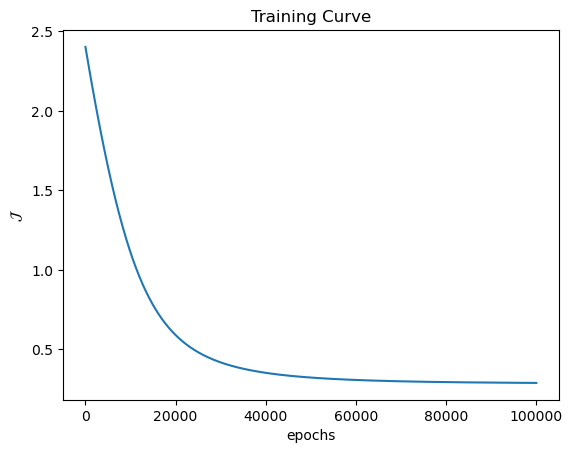

In [47]:
# fit a logistic regression to X and y (vip or not) has two classes (0 or 1)
log_reg = LogisticRegression()
log_reg.fit(X_training_normal, y_training, eta = 1e-4, epochs=1e5, show_curve = True)

In [48]:
y_hat_training = log_reg.predict(X_training_normal)

In [49]:
accuracy_train = accuracy(y_training, y_hat_training)
accuracy_train

0.9221427283111886

In [50]:
np.unique(y_hat_training)

array([0])

In [51]:
unique_pred, frequency_pred = np.unique(y_hat_training, return_counts = True)
frequency_pred

array([33266], dtype=int64)

## Test set

In [52]:
VIP_Test

,Player_Id,Deposit_Amount,Deposit_Quantity,Deposit_Method,Age,Country,Gender,Dim_Alert_Type_Desc,VIP
0,5890355,44.313120,20,debitcard,31.0,GP,M,First_Deposit,0.0
1,940061,56.223226,1,servipag,52.0,KM,?,Special,0.0
2,8549083,28.329851,13,visadebit,42.0,LK,F,?,0.0
3,7447056,0.000000,0,lateralpayments,33.0,IR,M,Special,0.0
4,7047755,0.000000,0,payr,29.0,MY,M,Special,0.0
...,...,...,...,...,...,...,...,...,...
14995,5873730,57.414164,1,usemybank,26.0,BI,M,All Deposit,0.0
14996,8247479,50.446116,1,ukash,25.0,IE,?,Sign Up,0.0
14997,9836345,30.707844,13,paysafecard,29.0,IT,M,?,0.0
14998,5836061,44.164896,15,sc-gvccashier,29.0,ZM,M,?,0.0


In [53]:
#check to see if there are any null values
VIP_Test.isnull().values.any()

True

In [54]:
#locate rows where null values appear
NaN_rows_test = VIP_Test[VIP_Test.isnull().any(axis=1)]
NaN_rows_test

,Player_Id,Deposit_Amount,Deposit_Quantity,Deposit_Method,Age,Country,Gender,Dim_Alert_Type_Desc,VIP
71,4347060,74.172227,4,firepay,22.0,RS,M,NaN,0.0
78,2022078,0.000000,1,visadebit,28.0,NaN,F,Re-deposit,0.0
84,9073880,39.200680,1,NaN,26.0,ID,M,Special,0.0
121,9568537,32.911299,1,NaN,35.0,JP,M,Sign Up,0.0
143,1242919,25.776504,3,neteller_neteller,NaN,BZ,M,Special,0.0
...,...,...,...,...,...,...,...,...,...
14830,3058536,0.000000,1,NaN,55.0,TM,F,Re-deposit,0.0
14890,2814770,68.402119,4,hipay,26.0,PE,NaN,?,0.0
14899,3517329,39.660122,4,v13_ebs,34.0,VC,M,NaN,0.0
14935,6300957,47.711400,3,muchbetter,29.0,BZ,NaN,Special,0.0


In [55]:
#delete all rows that contain NaN values in any cell
VIP_Test.dropna(axis=0, how='any',subset=None, inplace=True)  

In [56]:
VIP_Test

,Player_Id,Deposit_Amount,Deposit_Quantity,Deposit_Method,Age,Country,Gender,Dim_Alert_Type_Desc,VIP
0,5890355,44.313120,20,debitcard,31.0,GP,M,First_Deposit,0.0
1,940061,56.223226,1,servipag,52.0,KM,?,Special,0.0
2,8549083,28.329851,13,visadebit,42.0,LK,F,?,0.0
3,7447056,0.000000,0,lateralpayments,33.0,IR,M,Special,0.0
4,7047755,0.000000,0,payr,29.0,MY,M,Special,0.0
...,...,...,...,...,...,...,...,...,...
14995,5873730,57.414164,1,usemybank,26.0,BI,M,All Deposit,0.0
14996,8247479,50.446116,1,ukash,25.0,IE,?,Sign Up,0.0
14997,9836345,30.707844,13,paysafecard,29.0,IT,M,?,0.0
14998,5836061,44.164896,15,sc-gvccashier,29.0,ZM,M,?,0.0


In [57]:
#print the rows where '?' appear in the test set
print_None_rows_test = VIP_Test[VIP_Test.eq('?').any(axis=1)]  
print_None_rows_test.shape

(3475, 9)

In [58]:
#create another category called 'Deposit_Method_encoded' which contains the encoded Deposit Methods. The coding of labels is done in alphabetical order
VIP_Test['Deposit_Method_encoded'] = VIP_Test['Deposit_Method'].astype('category').cat.codes    #The Deposit Methods in 'Deposit_Method' are coded from 0 to 153 in alphabetical order

#create another category called 'Country_encoded' which contains the encoded Countries. The coding of labels is done in alphabetical order
VIP_Test['Country_encoded'] = VIP_Test['Country'].astype('category').cat.codes    #The country labels in 'Country' are coded from 0 to 194 in alphabetical order

# One hot encoding gender because there are only three categories: '?', 'M', 'F' and the categories are non-ordinal
Gender_encoded_test = pd.get_dummies(VIP_Test['Gender'], dtype=int, prefix="Gender") #one hot encode the unique gender categories as a dataframe
VIP_Test = VIP_Test.join(Gender_encoded_test) #join the dataframe to the main dataframe

# One hot encoding Dim_Alert_Type_Desc because there are only six categories: 'Sign up', 'Special', 'First_Deposit', 'Re-deposit', '?', 'All Deposit' and the categories are non-ordinal
Dim_Alert_Type_Desc_encoded_test = pd.get_dummies(VIP_Test['Dim_Alert_Type_Desc'], dtype=int, prefix = 'Dim_Alert_Type_Desc') #one hot encode the unique Dim_Alert_Type_Desc categories as a dataframe
VIP_Test = VIP_Test.join(Dim_Alert_Type_Desc_encoded_test) #join the dataframe to the main dataframe

In [59]:
VIP_Test

,Player_Id,Deposit_Amount,Deposit_Quantity,Deposit_Method,Age,Country,Gender,Dim_Alert_Type_Desc,VIP,Deposit_Method_encoded,Country_encoded,Gender_?,Gender_F,Gender_M,Dim_Alert_Type_Desc_?,Dim_Alert_Type_Desc_All Deposit,Dim_Alert_Type_Desc_First_Deposit,Dim_Alert_Type_Desc_Re-deposit,Dim_Alert_Type_Desc_Sign Up,Dim_Alert_Type_Desc_Special
0,5890355,44.313120,20,debitcard,31.0,GP,M,First_Deposit,0.0,24,76,0,0,1,0,0,1,0,0,0
1,940061,56.223226,1,servipag,52.0,KM,?,Special,0.0,127,101,1,0,0,0,0,0,0,0,1
2,8549083,28.329851,13,visadebit,42.0,LK,F,?,0.0,142,110,0,1,0,1,0,0,0,0,0
3,7447056,0.000000,0,lateralpayments,33.0,IR,M,Special,0.0,77,91,0,0,1,0,0,0,0,0,1
4,7047755,0.000000,0,payr,29.0,MY,M,Special,0.0,110,132,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,5873730,57.414164,1,usemybank,26.0,BI,M,All Deposit,0.0,133,25,0,0,1,0,1,0,0,0,0
14996,8247479,50.446116,1,ukash,25.0,IE,?,Sign Up,0.0,132,86,1,0,0,0,0,0,0,1,0
14997,9836345,30.707844,13,paysafecard,29.0,IT,M,?,0.0,111,93,0,0,1,1,0,0,0,0,0
14998,5836061,44.164896,15,sc-gvccashier,29.0,ZM,M,?,0.0,124,192,0,0,1,1,0,0,0,0,0


In [60]:
VIP_Test.drop(['Deposit_Method'], axis=1, inplace=True)
VIP_Test.drop(['Country'], axis=1, inplace=True)
VIP_Test.drop(['Gender'], axis=1, inplace=True)
VIP_Test.drop(['Dim_Alert_Type_Desc'], axis=1, inplace=True)

In [61]:
VIP_Test

,Player_Id,Deposit_Amount,Deposit_Quantity,Age,VIP,Deposit_Method_encoded,Country_encoded,Gender_?,Gender_F,Gender_M,Dim_Alert_Type_Desc_?,Dim_Alert_Type_Desc_All Deposit,Dim_Alert_Type_Desc_First_Deposit,Dim_Alert_Type_Desc_Re-deposit,Dim_Alert_Type_Desc_Sign Up,Dim_Alert_Type_Desc_Special
0,5890355,44.313120,20,31.0,0.0,24,76,0,0,1,0,0,1,0,0,0
1,940061,56.223226,1,52.0,0.0,127,101,1,0,0,0,0,0,0,0,1
2,8549083,28.329851,13,42.0,0.0,142,110,0,1,0,1,0,0,0,0,0
3,7447056,0.000000,0,33.0,0.0,77,91,0,0,1,0,0,0,0,0,1
4,7047755,0.000000,0,29.0,0.0,110,132,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,5873730,57.414164,1,26.0,0.0,133,25,0,0,1,0,1,0,0,0,0
14996,8247479,50.446116,1,25.0,0.0,132,86,1,0,0,0,0,0,0,1,0
14997,9836345,30.707844,13,29.0,0.0,111,93,0,0,1,1,0,0,0,0,0
14998,5836061,44.164896,15,29.0,0.0,124,192,0,0,1,1,0,0,0,0,0


In [62]:
VIP_Test.reset_index(drop=True, inplace=True)

In [63]:
VIP_Test

,Player_Id,Deposit_Amount,Deposit_Quantity,Age,VIP,Deposit_Method_encoded,Country_encoded,Gender_?,Gender_F,Gender_M,Dim_Alert_Type_Desc_?,Dim_Alert_Type_Desc_All Deposit,Dim_Alert_Type_Desc_First_Deposit,Dim_Alert_Type_Desc_Re-deposit,Dim_Alert_Type_Desc_Sign Up,Dim_Alert_Type_Desc_Special
0,5890355,44.313120,20,31.0,0.0,24,76,0,0,1,0,0,1,0,0,0
1,940061,56.223226,1,52.0,0.0,127,101,1,0,0,0,0,0,0,0,1
2,8549083,28.329851,13,42.0,0.0,142,110,0,1,0,1,0,0,0,0,0
3,7447056,0.000000,0,33.0,0.0,77,91,0,0,1,0,0,0,0,0,1
4,7047755,0.000000,0,29.0,0.0,110,132,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14257,5873730,57.414164,1,26.0,0.0,133,25,0,0,1,0,1,0,0,0,0
14258,8247479,50.446116,1,25.0,0.0,132,86,1,0,0,0,0,0,0,1,0
14259,9836345,30.707844,13,29.0,0.0,111,93,0,0,1,1,0,0,0,0,0
14260,5836061,44.164896,15,29.0,0.0,124,192,0,0,1,1,0,0,0,0,0


In [64]:
#check the values from the VIP column from the dataframe
VIP_Test['VIP'].unique()

array([0.])

In [67]:
X_test = VIP_Test[['Player_Id','Deposit_Amount','Deposit_Quantity','Age','Deposit_Method_encoded','Country_encoded',
                        'Gender_?', 'Gender_F', 'Gender_M', 'Dim_Alert_Type_Desc_?', 'Dim_Alert_Type_Desc_All Deposit',
                        'Dim_Alert_Type_Desc_First_Deposit', 'Dim_Alert_Type_Desc_Re-deposit', 'Dim_Alert_Type_Desc_Sign Up', 
                        'Dim_Alert_Type_Desc_Special']]

In [79]:
# normalise the columns 
X_test_normalised = (X_test-X_test.min())/(X_test.max()-X_test.min())
X_test_normalised

,Player_Id,Deposit_Amount,Deposit_Quantity,Age,Deposit_Method_encoded,Country_encoded,Gender_?,Gender_F,Gender_M,Dim_Alert_Type_Desc_?,Dim_Alert_Type_Desc_All Deposit,Dim_Alert_Type_Desc_First_Deposit,Dim_Alert_Type_Desc_Re-deposit,Dim_Alert_Type_Desc_Sign Up,Dim_Alert_Type_Desc_Special
0,0.588668,0.004416,0.322581,0.245283,0.156863,0.391753,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.093088,0.005603,0.016129,0.641509,0.830065,0.520619,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.854837,0.002823,0.209677,0.452830,0.928105,0.567010,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.744512,0.000000,0.000000,0.283019,0.503268,0.469072,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.704537,0.000000,0.000000,0.207547,0.718954,0.680412,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14257,0.587004,0.005722,0.016129,0.150943,0.869281,0.128866,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
14258,0.824643,0.005027,0.016129,0.132075,0.862745,0.443299,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14259,0.983706,0.003060,0.209677,0.207547,0.725490,0.479381,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
14260,0.583233,0.004401,0.241935,0.207547,0.810458,0.989691,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [80]:
X_test_normal = X_test_normalised.to_numpy()
X_test_normal

array([[0.58866822, 0.00441603, 0.32258065, ..., 0.        , 0.        ,
        0.        ],
       [0.09308789, 0.00560293, 0.01612903, ..., 0.        , 0.        ,
        1.        ],
       [0.85483692, 0.00282322, 0.20967742, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.98370639, 0.00306019, 0.20967742, ..., 0.        , 0.        ,
        0.        ],
       [0.58323278, 0.00440126, 0.24193548, ..., 0.        , 0.        ,
        0.        ],
       [0.52157453, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [69]:
y_test = VIP_Test['VIP'].to_numpy()
y_test = np.array(y_test)

In [70]:
X_test.shape, y_test.shape

((14262, 15), (14262,))

In [71]:
# prediction on test
y_hat_test = log_reg.predict(X_test)

C:\Users\vineetsivadasan\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [73]:
np.unique(y_hat_test)

array([0, 1])

In [76]:
unique, frequency = np.unique(y_test, return_counts = True)
print(unique, frequency)

[0.] [14262]


In [78]:
unique_pred, frequency_pred = np.unique(y_hat_test, return_counts = True)
print(unique_pred, frequency_pred)

[0 1] [    1 14261]


In [77]:
accuracy_test = accuracy(y_test, y_hat_test)
accuracy_test

7.011639321273313e-05